In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import math
import os

# PCA on two not yet cleaned images

In [2]:
# read images
img_grey_1 = cv2.imread('thermal_1579648028_0_0.png', cv2.IMREAD_GRAYSCALE)
img_grey_2 = cv2.imread('thermal_1597528867_0_0.png', cv2.IMREAD_GRAYSCALE)

# scaling between 0 and 1
img_df_1 = img_grey_1/255
img_df_2 = img_grey_2/255

In [3]:
# fit and transform data in pca

pca_1 = PCA(n_components=30)
pca_1.fit(img_df_1)
trans_pca_1 = pca_1.transform(img_df_1)
img_reduced_1 = pca_1.inverse_transform(trans_pca_1)

pca_2 = PCA(n_components=30)
pca_2.fit(img_df_2)
trans_pca_2 = pca_2.transform(img_df_2)
img_reduced_2 = pca_2.inverse_transform(trans_pca_2)

In [4]:
# new dimensions
[trans_pca_1.shape, trans_pca_2.shape]

[(512, 30), (512, 30)]

In [5]:
# explained variance ratio (want it close to 1)
print(f"Image 1 : {sum(pca_1.explained_variance_ratio_)}")
print(f"Image 2 : {sum(pca_2.explained_variance_ratio_)}")

Image 1 : 0.9651822752635413
Image 2 : 0.9808437447126624


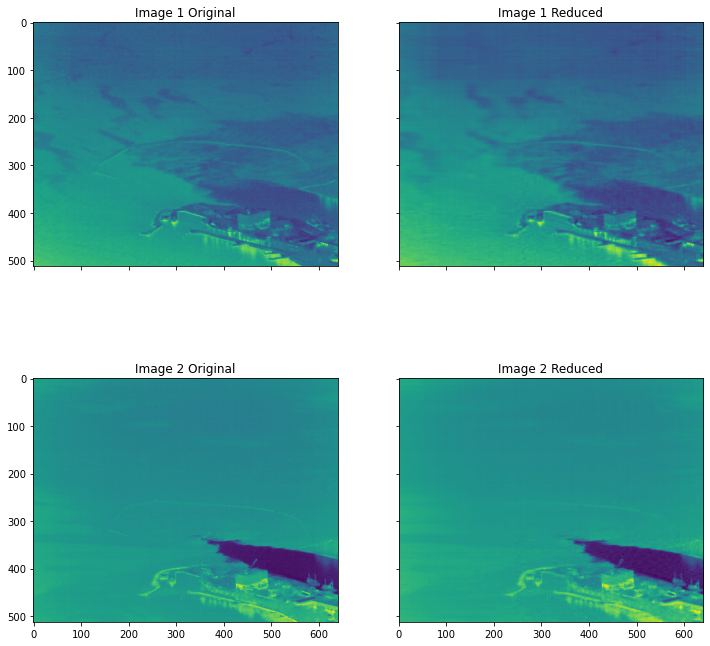

In [6]:
# plotting originals and reduced (inverse transform of the transformed image)

fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize = (12,12))
axs[0,0].imshow(img_grey_1)
axs[0,1].imshow(img_reduced_1)

axs[1,0].imshow(img_grey_2)
axs[1,1].imshow(img_reduced_2)

axs[0,0].set_title('Image 1 Original')
axs[0,1].set_title('Image 1 Reduced')
axs[1,0].set_title('Image 2 Original')
axs[1,1].set_title('Image 2 Reduced')

plt.show()

# PCA on 36 cropped, black and white images

In [7]:
# We import the data
data = []
folderSave = 'Image Classification/Save'
for filename in os.listdir(folderSave):
        img = cv2.imread(os.path.join(folderSave,filename), cv2.IMREAD_GRAYSCALE)
        data.append(img/255)
data = np.array(data)
data.shape

(36, 260, 370)

In [8]:
# loop through each image and transform it using PCA, store the transformed data and reduced images
transformed_data = []
reduced_imgs = []

pca = PCA(n_components=30)

for img in range(data.shape[0]):
    pca.fit(data[img])
    trans_pca = pca.transform(data[img])
    img_reduced = pca.inverse_transform(trans_pca)
    transformed_data.append(trans_pca)
    reduced_imgs.append(img_reduced)
    print(f"Image {img+1} : {sum(pca.explained_variance_ratio_)}")

reduced_imgs = np.array(reduced_imgs)
transformed_data = np.array(transformed_data)

Image 1 : 0.8982841247030932
Image 2 : 0.7113045491742512
Image 3 : 0.8875215523822583
Image 4 : 0.9802555576090511
Image 5 : 0.9482569071919575
Image 6 : 0.9694052834983744
Image 7 : 0.92911481903001
Image 8 : 0.9599508174543222
Image 9 : 0.8549327447235401
Image 10 : 0.9835826562552966
Image 11 : 0.8555999074421969
Image 12 : 0.9839374508061838
Image 13 : 0.8782056754903256
Image 14 : 0.9831720992967774
Image 15 : 0.9817383461347758
Image 16 : 0.8197759699611702
Image 17 : 0.9120893648769521
Image 18 : 0.9781009591288662
Image 19 : 0.9766627539835854
Image 20 : 0.9687940593730616
Image 21 : 0.9844135603942218
Image 22 : 0.9822599648428281
Image 23 : 0.9252564213972337
Image 24 : 0.8966641560839345
Image 25 : 0.9318733219557085
Image 26 : 0.9805064466295611
Image 27 : 0.9849532127081032
Image 28 : 0.9226524893239259
Image 29 : 0.9753194007195174
Image 30 : 0.8734716075668348
Image 31 : 0.9583987569193835
Image 32 : 0.9841808986372131
Image 33 : 0.8699190193429832
Image 34 : 0.92759379

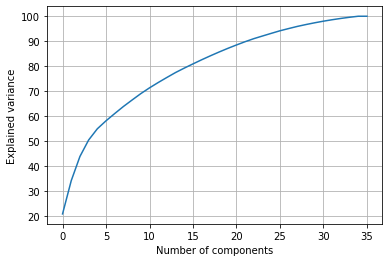

In [9]:
# doing PCA on full dataset instead of one image at a time
# need to use a lot more data for this to be good I think

temp_data = data.reshape(data.shape[0], data.shape[1]*data.shape[2])
num_comp = temp_data.shape[1]

pca_784 = PCA(n_components=36)
pca_784.fit(temp_data)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

# Clustering using k-means

In [10]:
# creating a dataset that will be used for clustering

cluster_data = transformed_data.reshape((transformed_data.shape[0], transformed_data.shape[1]*transformed_data.shape[2]))
np.random.seed(1)

n=4
kmeans = KMeans(n_clusters=n,init='random')
kmeans.fit(cluster_data)
Z = kmeans.predict(cluster_data)

cluster 0
19 elements


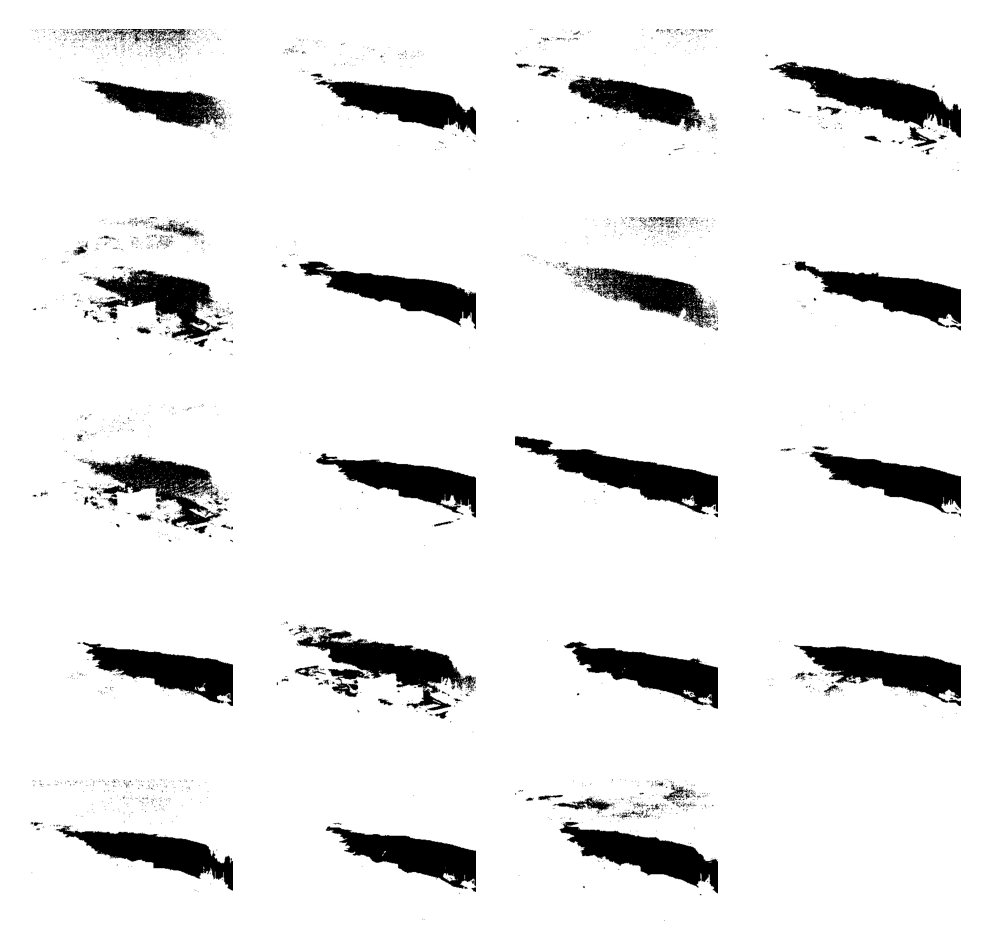

cluster 1
8 elements


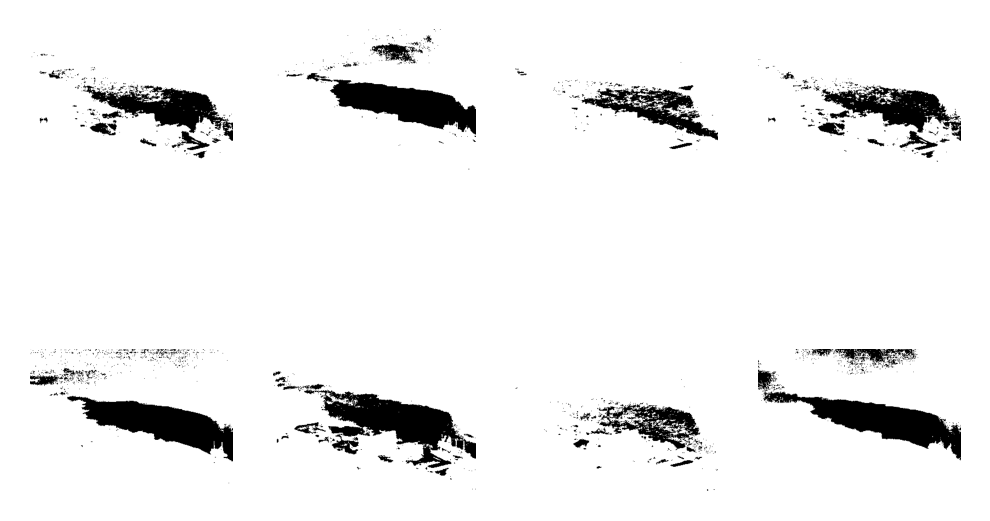

cluster 2
6 elements


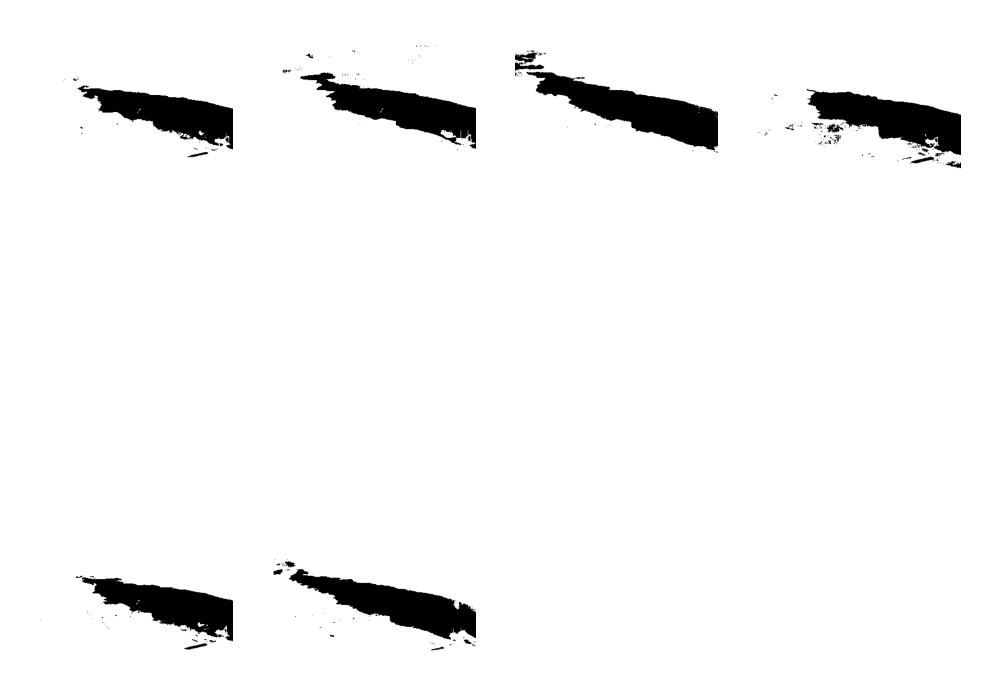

cluster 3
3 elements


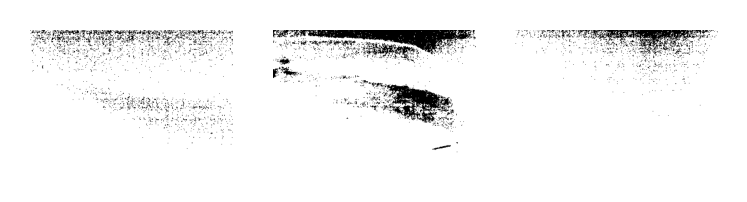

In [11]:
# We plot the resulting clusters
for i in range(0,n):
    
    row = np.where(Z==i)[0] # row in Z for elements of cluster i
    num = row.shape[0]      # number of elements for each cluster
    r = np.floor(num/4.)   # number of rows in the figure of the cluster
    
    print("cluster " + str(i))
    print(str(num) + " elements")
    
    plt.figure(figsize=(4,4), dpi=300)
    for k in range(0, num):
        plt.subplot(int(r+1), 4, k+1)
        image = data[row[k], ]
        #image = image.reshape(260, 370)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

In [12]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(os.listdir(folderSave),kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [17]:
print(f'Cluster 0: {groups[0]} \n')
print(f'Cluster 1: {groups[1]} \n')
print(f'Cluster 2: {groups[2]} \n')
print(f'Cluster 3: {groups[3]} \n')

Cluster 0: ['thermal_1593382927_0_0.png', 'thermal_1591913168_0_0.png', 'thermal_1581117548_0_0.png', 'thermal_1579043408_0_0.png', 'thermal_1579648928_0_0.png', 'thermal_1590166027_0_0.png', 'thermal_1580773387_0_0.png', 'thermal_1593729787_0_0.png', 'thermal_1579648028_0_0.png', 'thermal_1593902768_0_0.png', 'thermal_1595455275_0_0.png', 'thermal_1592690767_0_0.png', 'thermal_1594852028_0_0.png', 'thermal_1579388768_0_0.png', 'thermal_1597874767_0_0.png', 'thermal_1591653968_0_0.png', 'thermal_1587939607_0_0.png', 'thermal_1595887328_0_0.png', 'thermal_1590444608_0_0.png'] 

Cluster 1: ['thermal_1579562768_0_0.png', 'thermal_1591914367_0_0.png', 'thermal_1585091648_0_0.png', 'thermal_1579561868_0_0.png', 'thermal_1587420134_0_0.png', 'thermal_1579389434_0_0.png', 'thermal_1585181228_0_0.png', 'thermal_1588116608_0_0.png'] 

Cluster 2: ['thermal_1596838748_0_0.png', 'thermal_1597096988_0_0.png', 'thermal_1626571208_0_0.png', 'thermal_1632537008_0_0.png', 'thermal_1597528867_0_0.png', 

In [14]:
cluster_data.shape

(36, 7800)

# Clustering using DBSCAN

In [15]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

results = []
for i in range(0, len(eps_list)):
    eps = eps_list[i]
    labels = DBSCAN(eps=eps).fit_predict(cluster_data)
    results.append(labels)

In [16]:
results

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1